In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stem = "/Users/bandari/Documents/git.repos/rrlfe/"

In [3]:
# read in a 

file_name = stem + "ew_products/all_sdss_spectra_20211118_restacked_ew_info_good_only_w_net_balmer_errors.csv"

In [4]:
df = pd.read_csv(file_name)

In [5]:
df.keys()

Index(['realization_spec_file_name', 'orig_spec_file_name', 'EW_Hbeta',
       'err_EW_Hbeta_from_robo', 'EW_Hdelta', 'err_EW_Hdelta_from_robo',
       'EW_Hgamma', 'err_EW_Hgamma_from_robo', 'EW_Heps',
       'err_EW_Heps_from_robo', 'EW_CaIIK', 'err_EW_CaIIK_from_robo',
       'EW_Balmer', 'err_EW_Balmer_based_Robo',
       'err_EW_Balmer_based_noise_churning'],
      dtype='object')

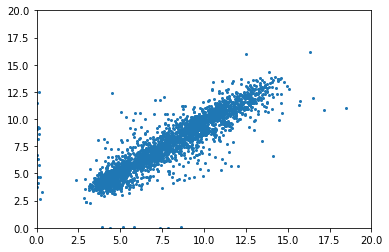

In [12]:
plt.scatter(df["EW_Hdelta"], df["EW_Hgamma"], s=4)
plt.xlim([0,20])
plt.ylim([0,20])
plt.show()

In [ ]:
# np.logical_and(df["EW_Hdelta"] > 0.5, df["EW_Hdelta"] < 20.)
# np.logical_and(df["EW_Hgamma"] > 0.5, df["EW_Hgamma"] < 20.)

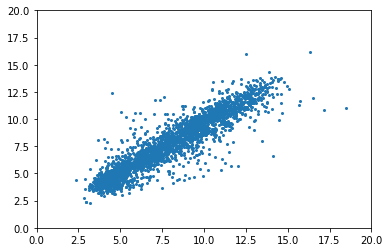

In [7]:
# get rid of really bad points

idx_cond = np.logical_and(
                        np.logical_and(df["EW_Hdelta"] > 0.5, df["EW_Hdelta"] < 20.),
                        np.logical_and(df["EW_Hgamma"] > 0.5, df["EW_Hgamma"] < 20.)
                        )
plt.scatter(df["EW_Hdelta"].where(idx_cond), df["EW_Hgamma"].where(idx_cond), s=4)
plt.xlim([0,20])
plt.ylim([0,20])
plt.show()

In [15]:
df["EW_Hdelta"].where(idx_cond).dropna()

0       10.924209
1        4.347744
2       11.430905
3        9.487499
4        8.852915
          ...    
2674    10.297540
2675    12.604587
2676     9.908558
2677     9.345149
2678     8.120021
Name: EW_Hdelta, Length: 2568, dtype: float64

In [18]:
coeff, cov = np.polyfit(df["EW_Hdelta"].where(idx_cond).dropna(), 
                        df["EW_Hgamma"].where(idx_cond).dropna(), deg=1, full=False, cov=True)
m = coeff[0]
b = coeff[1]
err_m = np.sqrt(np.diag(cov))[0]
err_b = np.sqrt(np.diag(cov))[1]

In [19]:
err_m

0.007212101399056228

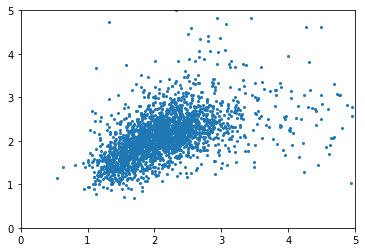

In [20]:
plt.clf()
plt.scatter(df["err_EW_Hdelta_from_robo"], df["err_EW_Hgamma_from_robo"], s=4)
plt.xlim([0,5])
plt.ylim([0,5])
plt.show()

In [ ]:
# define the functions going into the propagation

def del_t_del_Hgamma(m_pass):

    return np.divide(1.,m_pass)


def del_t_del_b(m_pass):

    return -np.divide(1.,m_pass)


def del_t_del_m(Hgamma_pass, b_pass, m_pass):

    return -np.divide(np.subtract(Hgamma_pass,b_pass),np.power(m_pass,2.))

In [18]:
df["err_EW_Hdelta_from_robo"]

0       2.249552
1       1.740257
2       2.314742
3       2.183305
4       2.975254
          ...   
2674    2.881335
2675    2.613950
2676    1.546417
2677    2.311706
2678    1.792197
Name: err_EW_Hdelta_from_robo, Length: 2679, dtype: float64